### Reza Taeb - Statistical Project No.3 : 

# Hospital Readmissions Data Analysis and Recommendations for Reduction

In [50]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
#import seaborn as sns

In [51]:
# read in readmissions data provided

hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

## Preliminary Analysis

In [52]:
# deal with missing and inconvenient portions of data 

clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')



print (clean_hospital_read_df.head(5))
print (clean_hospital_read_df.info())

                              Hospital Name  Provider Number State  \
16857           THREE RIVERS MEDICAL CENTER           180128    KY   
14582  SELLS INDIAN HEALTH SERVICE HOSPITAL            30074    AZ   
15606     PHS INDIAN HOSPITAL AT PINE RIDGE           430081    SD   
15615    FLORIDA STATE HOSPITAL UNIT 31 MED           100298    FL   
14551                GREENE COUNTY HOSPITAL            10051    AL   

                 Measure Name  Number of Discharges  Footnote  \
16857  READM-30-HIP-KNEE-HRRP                     0       7.0   
14582      READM-30-COPD-HRRP                     0       7.0   
15606       READM-30-AMI-HRRP                     0       7.0   
15615      READM-30-COPD-HRRP                     0       7.0   
14551       READM-30-AMI-HRRP                     0       7.0   

       Excess Readmission Ratio  Predicted Readmission Rate  \
16857                       NaN                         NaN   
14582                       NaN                         NaN   

/Users/rtmac/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


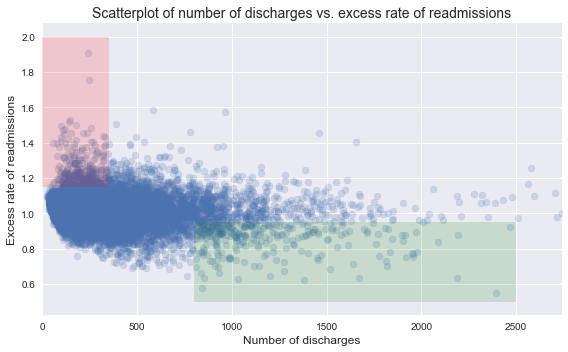

In [53]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

#### A. Initial observations based on the plot above

###### A.1  
I do not agree with the first statement, and by just looking at the plot we can not get the sense of downward trend of "rate of readmissions" with increasing number of "discharge". Actually the plot shows us relatively neutral relationship between rate of readmissions and discharge number. This statement can be correct for the small range of number of discharge but not for the whole range. Although this argument also need more statistical exploration. 

###### A.2 
By looking to the plot it's not correct to say : "with the lower number of discharge, there is a greater incidence of excess rate of readmissions". Actually the opposite statement can be more meaningful based on the plot. In other words, probably with the lower number of discharge, there is a lower incidence of excess rate of readmission compared to lower rate of readmission. In addition, This statement can be a very weak statement by just looking to the plot and it needs more statistical exploration.    

###### A.3 
This statement can not be correct, since with higher number of discharge, we can not easily compare the lower rate of readmission group and higher rate of readmission group. 

Actually all of the statements of part "A" are very weak driven by just looking to the plots. In other words, for providing more powerful statements we absolutely need some statistical tests. 

#### B. Statistics

###### B.1   In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [54]:
# Mean and percentage of excess readmission greater than 1 for low number of discharge hospitals 
clean_hospital_read_df_low_discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
print ("In hospitals/facilities with number of discharges < 100, mean excess readmission rate is:",clean_hospital_read_df_low_discharge['Excess Readmission Ratio'].mean())
print ("In hospitals/facilities with number of discharges < 100,", np.sum(clean_hospital_read_df_low_discharge['Excess Readmission Ratio'] > 1)/(clean_hospital_read_df_low_discharge['Excess Readmission Ratio'].count()), "have excess readmission rate greater than 1.")


In hospitals/facilities with number of discharges < 100, mean excess readmission rate is: 1.0226183501683506
In hospitals/facilities with number of discharges < 100, 0.632154882155 have excess readmission rate greater than 1.


The given statement is compeletly true. In hospitals/facilities with number of discharges < 100, ** mean excess readmission rate is 1.023 and 63.2% have excess readmission rate greater than 1. ** 

###### B.2   In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [55]:
# Mean and percentage of excess readmission greater than 1 for low number of discharge hospitals 
clean_hospital_read_df_high_discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
print ("In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is:",clean_hospital_read_df_high_discharge['Excess Readmission Ratio'].mean())
print ("In hospitals/facilities with number of discharges > 1000,", np.sum(clean_hospital_read_df_high_discharge['Excess Readmission Ratio'] > 1)/(clean_hospital_read_df_high_discharge['Excess Readmission Ratio'].count()), "have excess readmission rate greater than 1.")


In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is: 0.9783354211663071
In hospitals/facilities with number of discharges > 1000, 0.444924406048 have excess readmission rate greater than 1.


The given statement is compeletly true. In hospitals/facilities with number of discharges > 1000, ** mean excess readmission rate is 0.978 and 44.5% have excess readmission rate greater than 1. ** 

*** Important note : The data shows the mentioned statistics but for generalizing the statements we need to do hypothesis testing. *** 

#### C. Conclusions


###### C.1  There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 

In [56]:
# Correlation between hospital capacity (number of discharges) and readmission rates.

print (clean_hospital_read_df['Number of Discharges'].corr(clean_hospital_read_df['Excess Readmission Ratio']))

-0.0973979435108


The correlation coefficent between 'number of discharges' and 'readmission rates' is - 0.097 which does not show remarkable correlation. However, ** for testing whether hospital capacity and readmission rates have significant correlations or not, we have to calculate the p-value. In other words, by just looking to the correlaion coeeficient we can not conclude that the correlation is statistically significant or not. **

###### C.2 Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

This conclusion can not be drawn based on the above approach. In addition to need of doing the analysis in a more powerful statistical way by defining hypothesis, choosing appropiate test statistic and measuring the statistical significant of a measure, we also need more data in order to relate the "size of hospital" to "necessary resources". 

**D. Regulatory policy recommendations**

###### D.1 Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

###### D.2 Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


These recommendations also need more data especially in areas of human resource management and etc. In addition, the above approach is not a scientific approach that can lead us to reasonable results and recommendations 



** In general, actually none of the above argument can be supported by the above approach. Therefore, I am going to construct a meaningful and scientific approach below.** 

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### B.1 Setup an appropriate hypothesis test 

For comparing the hospitals with high and low number of discharegs in terms of excess rate of readmission, I define the Null hypothesis and alternative hypothesis as follow: 

H0 : There is no significant difference in excess rate of readmission between hospitals with high number of discharegs (>1000) and hospitals with low number of discharegs (<100) . 

H1 : There is a significant difference in excess rate of readmission between hospitals with high number of discharegs (>1000) and hospitals with low number of discharegs (<100) .


#### B.2 Compute and report the observed significance value (or p-value).



Excess readmission ratio for low number of discharges: 1.0226183501683506
Excess readmission ratio for big number of discharges: 0.9783354211663071


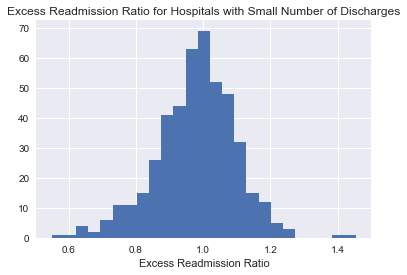

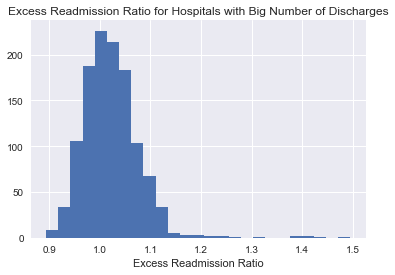

Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)
The p-value is: 0.000 


In [57]:
# Compare small and big hospitals excess rate of readmission and calculating their p-values.

# Small number of discharges 
hospital_read_df_small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100 ]
clean_hospital_read_df_small = hospital_read_df_small.dropna(subset=['Excess Readmission Ratio'])
small_mean_rate_readmission = np.mean(clean_hospital_read_df_small['Excess Readmission Ratio'])
print ("Excess readmission ratio for low number of discharges:", small_mean_rate_readmission)

# Big number of discharges 
hospital_read_df_big = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000 ]
clean_hospital_read_df_big = hospital_read_df_big.dropna(subset=['Excess Readmission Ratio'])
big_mean_rate_readmission = np.mean(clean_hospital_read_df_big['Excess Readmission Ratio'])
print ("Excess readmission ratio for big number of discharges:", big_mean_rate_readmission)

# Plot Excess readmission ratio with small and big number of discharges
plt.hist(clean_hospital_read_df_big['Excess Readmission Ratio'], bins=25)
plt.xlabel('Excess Readmission Ratio')
plt.title('Excess Readmission Ratio for Hospitals with Small Number of Discharges')
plt.show()
plt.hist(clean_hospital_read_df_small['Excess Readmission Ratio'], bins=25)
plt.xlabel('Excess Readmission Ratio')
plt.title('Excess Readmission Ratio for Hospitals with Big Number of Discharges')
plt.show()


# Do two sample t-test and compute p-value. 

result = stats.ttest_ind(clean_hospital_read_df_small["Excess Readmission Ratio"], clean_hospital_read_df_big["Excess Readmission Ratio"])
print (result)
print ("The p-value is: %.3f " %result[1])

#### B.3 Report statistical significance for $\alpha$ = .01

The P-Value is very smaller than 0.01, so we can reject the null hypothesis and it's safe to say that **"There is a significant difference in exess readmission ratio between hospitals with big number of discharges and hospitals with low number of discharges." **



#### B.4 Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

While the statistic test shows that the finding is statistically significant and there is significant difference in excess readmission ratio between hospitals with low and high number of discharges, the mean of these two groups are very close together. So in practice and for giving the recommendations, it may not be very safe to distinguish between these two groups. In addition, about the particluar recommendations that are mentioned above, we can not conclude that smaller number of discharges has a correlation with the size of hospitals necessarily. In other words, for giving more accurate practical recommendations we need more data. 

#### B.5. Look at the scatterplot above. 

- What are the advantages and disadvantages of using this plot to convey information?

Scatter plot can give us a very initiall insight of the possible relationship between "number of discharge" and "excess readmission ratio". It also can give us whether special region in the plot shows unique behavior or the whole region follows uniform pattern. The disadvatnge of depending a lot on this plot can be drawing a conclusion which is not statistically proven and maybe it's totally wrong.    



      
- Construct another plot that conveys the same information in a more direct manner.

/Users/rtmac/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


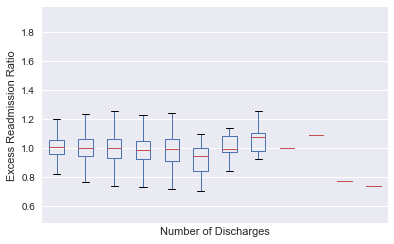

In [59]:
# plot the box plot of the "excess readmission ratio" and "number of discharges"

step =  (clean_hospital_read_df['Number of Discharges'].max()-clean_hospital_read_df['Number of Discharges'].min())/20
clean_hospital_read_df['Number of Discharges Group'] = clean_hospital_read_df['Number of Discharges']/step
clean_hospital_read_df['Number of Discharges Group'] = clean_hospital_read_df['Number of Discharges Group'].apply(np.int64)


clean_hospital_read_df.boxplot(column= 'Excess Readmission Ratio', by='Number of Discharges Group')
plt.suptitle("")
plt.xlabel("Number of Discharges")
plt.xticks([])
plt.ylabel("Excess Readmission Ratio")

plt.title("")
plt.show()

Based on the above plot, we can say different group of number of discharges have relatively similar distribution and their median of Excess Readmission Ratio is very close together ("1"). 